NAME - YASH MOR
UID - 2018140039
BATCH - C

In [2]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
# We have Antecedents as Light and Object Motion.

light = ctrl.Antecedent(np.arange(0,11), 'light')
motion = ctrl.Antecedent(np.arange(0,11), 'motion')

# We have Consequents as Aperture and Shutter Speed.

aperture = ctrl.Consequent(np.arange(0,11), 'aperture')
shutter_speed = ctrl.Consequent(np.arange(0,11), 'shutter_speed')

In [4]:
# Creating Custom Membership Functions using Trimf
# Antecedents

light['Low'] = fuzz.trimf(light.universe, [0, 0, 5])
light['Moderate'] = fuzz.trimf(light.universe, [0, 5, 10])
light['High'] = fuzz.trimf(light.universe, [5, 10, 10])

motion['Static'] = fuzz.trimf(motion.universe, [0, 0, 5])
motion['Mobile'] = fuzz.trimf(motion.universe, [0, 5, 10])
motion['Highly Mobile'] = fuzz.trimf(motion.universe, [5, 10, 10])

# Consequents

aperture['Low'] = fuzz.trimf(aperture.universe, [0, 0, 5])
aperture['Moderate'] = fuzz.trimf(aperture.universe, [0, 5, 10])
aperture['High'] = fuzz.trimf(aperture.universe, [5, 10, 10])

shutter_speed['Low'] = fuzz.trimf(shutter_speed.universe, [0, 0, 5])
shutter_speed['Moderate'] = fuzz.trimf(shutter_speed.universe, [0, 5, 10])
shutter_speed['High'] = fuzz.trimf(shutter_speed.universe, [5, 10, 10])

C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


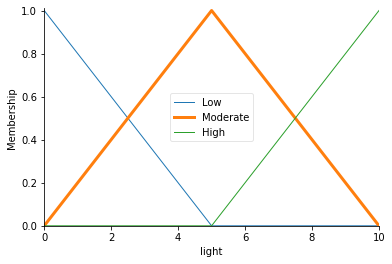

In [5]:
light['Moderate'].view()

C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


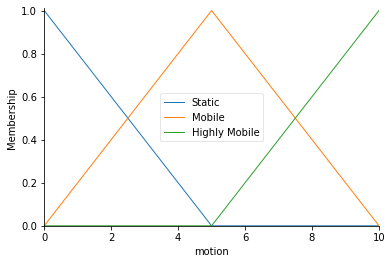

In [6]:
motion.view()

C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


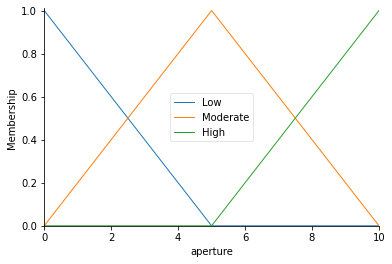

In [7]:
aperture.view()

C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


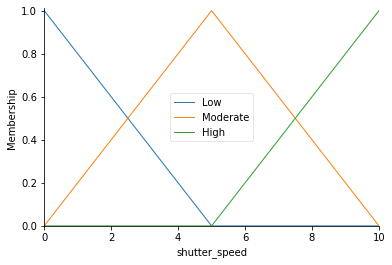

In [8]:
shutter_speed.view()

In [9]:
# Defining the Output Rules.

rule1 = ctrl.Rule(antecedent=(light['Low'] & motion['Static']), consequent=(aperture['High'], shutter_speed['Low']))
rule2 = ctrl.Rule(antecedent=(light['Moderate'] & motion['Static']), consequent=(aperture['Moderate'], shutter_speed['Moderate']))
rule3 = ctrl.Rule(antecedent=(light['High'] & motion['Static']), consequent=(aperture['Low'], shutter_speed['High']))

rule4 = ctrl.Rule(antecedent=(light['Low'] & motion['Mobile']), consequent=(aperture['High'], shutter_speed['Moderate']))
rule5 = ctrl.Rule(antecedent=(light['Moderate'] & motion['Mobile']), consequent=(aperture['Moderate'], shutter_speed['High']))
rule6 = ctrl.Rule(antecedent=(light['High'] & motion['Mobile']), consequent=(aperture['Low'], shutter_speed['Moderate']))

rule7 = ctrl.Rule(antecedent=(light['Low'] & motion['Highly Mobile']), consequent=(aperture['High'], shutter_speed['Moderate']))
rule8 = ctrl.Rule(antecedent=(light['High'] & motion['Highly Mobile']), consequent=(aperture['Low'], shutter_speed['High']))

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

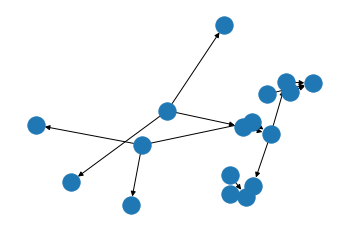

In [10]:
rule1.view()

In [11]:
# Creating the Control System.

camera_ctrl = ctrl.ControlSystem(rules=[rule1, rule2, rule3, rule4, 
                                   rule5, rule6, rule7, rule8])

In [12]:
camera_output = ctrl.ControlSystemSimulation(camera_ctrl)

In [13]:
# Passing Inputs to Output Parameters.

camera_output.input['light'] = 10
camera_output.input['motion'] = 10

# Evaluating the inputs.

camera_output.compute()

Aperture :  1.6666666666666665
Shutter Speed :  8.333333333333334


C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\morya\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


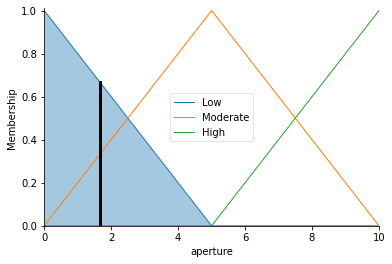

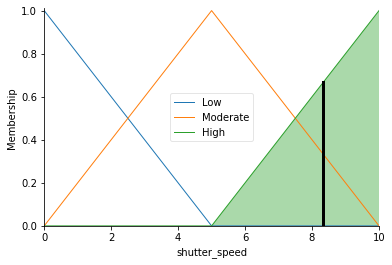

In [14]:
print("Aperture : ", camera_output.output['aperture'])
print("Shutter Speed : ", camera_output.output['shutter_speed'])

aperture.view(sim=camera_output)
shutter_speed.view(sim=camera_output)